<a href="https://colab.research.google.com/github/pishnik212/CW3Project/blob/master/%D0%98%D0%98_k_means_%D0%98%D1%82%D0%BE%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [71]:
import gdown
urlTrain = 'https://docs.google.com/spreadsheets/d/1jxjMOI7YTq10tvvrvOdG256BbaFVddwK/edit?usp=sharing&ouid=101814328525804410046&rtpof=true&sd=true'
gdown.download(urlTrain, 'diabets.xlsx', fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1jxjMOI7YTq10tvvrvOdG256BbaFVddwK
To: /content/diabets.xlsx
100%|██████████| 48.7k/48.7k [00:00<00:00, 47.9MB/s]


'diabets.xlsx'

In [72]:
df = pd.read_excel('diabets.xlsx')
df.fillna(0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Количество беременностей

Глюкоза
Концентрация глюкозы в плазме крови через 2 часа при проведении перорального теста на толерантность к глюкозе

Артериальное давление
Диастолическое артериальное давление (мм рт. ст.)

Толщина кожи
Толщина кожной складки трицепса (мм)

Инсулин
2-часовой инсулин в сыворотке крови (мю Ед/мл)

ИМТ
Индекс массы тела (вес в кг/(рост в м)^2)

DiabetesPedigreeFunction
Функция родословной диабета

Возраст
Возраст (годы)

Результат
Классовая переменная (0 или 1)

Переведено с помощью DeepL.com (бесплатная версия)

In [74]:
cols = ['Age', 'SkinThickness', 'Insulin']
X = df[cols].fillna(0)
X.head()

,Age,SkinThickness,Insulin
0,50,35,0
1,31,29,0
2,32,0,0
3,21,23,94
4,33,35,168


In [75]:
kluster_number = 4
sse = []
ssee = []

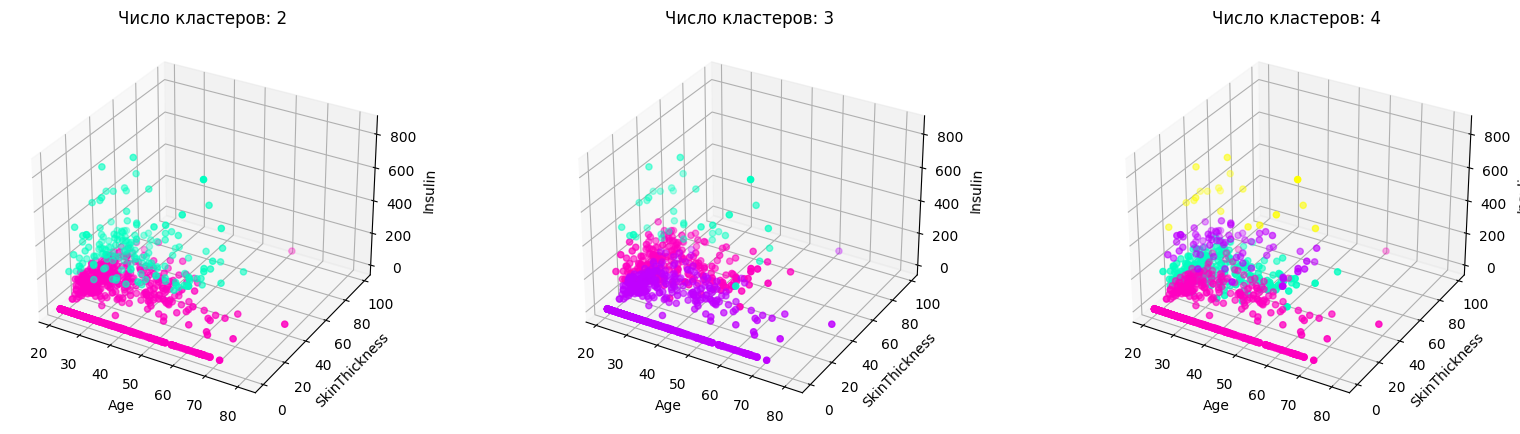

In [76]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

colors = ['#ff00c0', '#01ffc1', '#c001ff', '#ffff01', '#0080ff', '#52f915']

kluster_number = 4

fig, axs = plt.subplots(1, kluster_number - 1, figsize=(20, 5), subplot_kw={'projection': '3d'})

for k in range(1, kluster_number):
    kmeans = KMeans(n_clusters=k+1)
    X["cluster"] = kmeans.fit_predict(X)
    ssee.append(kmeans.inertia_)

    # use a different color for each cluster
    for i in np.unique(X["cluster"]):
        axs[k-1].scatter3D(X[X["cluster"]==i][cols[0]], X[X["cluster"]==i][cols[1]], X[X["cluster"]==i][cols[2]], c=[colors[i]])

    axs[k-1].set_title(f"Число кластеров: {k+1}")
    axs[k-1].set_xlabel(cols[0])
    axs[k-1].set_ylabel(cols[1])
    axs[k-1].set_zlabel(cols[2])

plt.show()

In [77]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd


cols =['Age', 'SkinThickness', 'Insulin'] #  ['BMI', 'BloodPressure', 'Insulin']
X = df[cols]

kluster_number = 4

colors = ['#ff00c0', '#01ffc1', '#c001ff', '#ffff01', '#0080ff', '#52f915']

fig = go.Figure()

for k in range(1, kluster_number):
    kmeans = KMeans(n_clusters=k+1)
    X["cluster"] = kmeans.fit_predict(X)

    for i in np.unique(X["cluster"]):
        cluster_data = X[X["cluster"] == i]
        fig.add_trace(go.Scatter3d(
            x=cluster_data[cols[0]],
            y=cluster_data[cols[1]],
            z=cluster_data[cols[2]],
            mode='markers',
            marker=dict(color=colors[i]),
            name=f'Cluster {i+1} (k={k+1})'
        ))

fig.update_layout(
    title="3D Clustering",
    scene=dict(
        xaxis_title=cols[0],
        yaxis_title=cols[1],
        zaxis_title=cols[2]
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

<ipython-input-77-a2b0fcd37a73>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-a2b0fcd37a73>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-a2b0fcd37a73>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



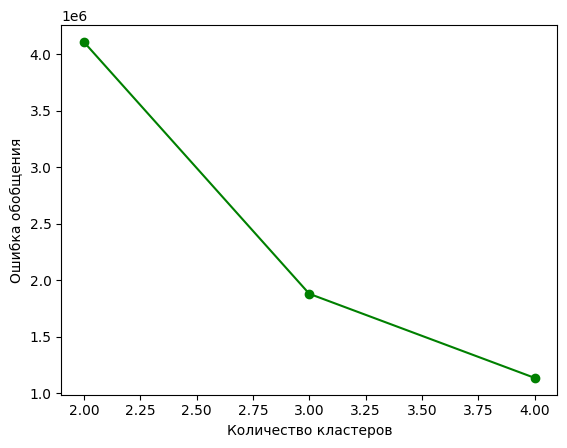

In [78]:
plt.plot(range(2,5), ssee, marker='o', color='g')
plt.xlabel('Количество кластеров')
plt.ylabel('Ошибка обобщения')
plt.show()

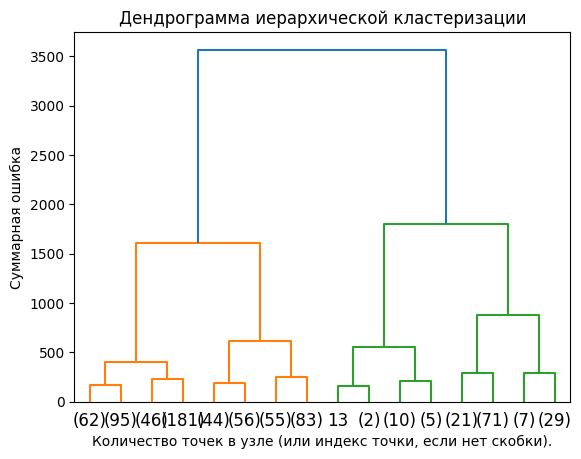

In [79]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pandas as pd


cols = ['Age', 'SkinThickness', 'Insulin']
X = df[cols]

model = AgglomerativeClustering(n_clusters=3)
model.fit(X)


Z = linkage(X, method='ward')


def plot_dendrogram(Z, **kwargs):
    dendrogram(Z, **kwargs)


plt.title("Дендрограмма иерархической кластеризации")
plot_dendrogram(Z, truncate_mode="level", p=3)
plt.xlabel("Количество точек в узле (или индекс точки, если нет скобки).")
plt.ylabel("Суммарная ошибка")
plt.show()